In [1]:
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf

2025-03-16 22:19:58.297061: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742163601.252672    2860 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742163602.034020    2860 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742163607.523934    2860 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1742163607.523974    2860 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1742163607.523977    2860 computation_placer.cc:177] computation placer alr

In [2]:
# Load dataset langsung dari Google Drive
df = pd.read_csv('https://drive.google.com/uc?id=15RfMD9lNkpS3cVN7j3_dsJKZ8_5RJG5z')
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [3]:
df.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

Ngomong-ngomong karena pada latihan ini berjudul univariate, kita hanya akan menggunakan satu fitur yaitu meantemp dan date sebagai interval waktunya.

In [4]:
dates = df['date'].values
temp  = df['meantemp'].values

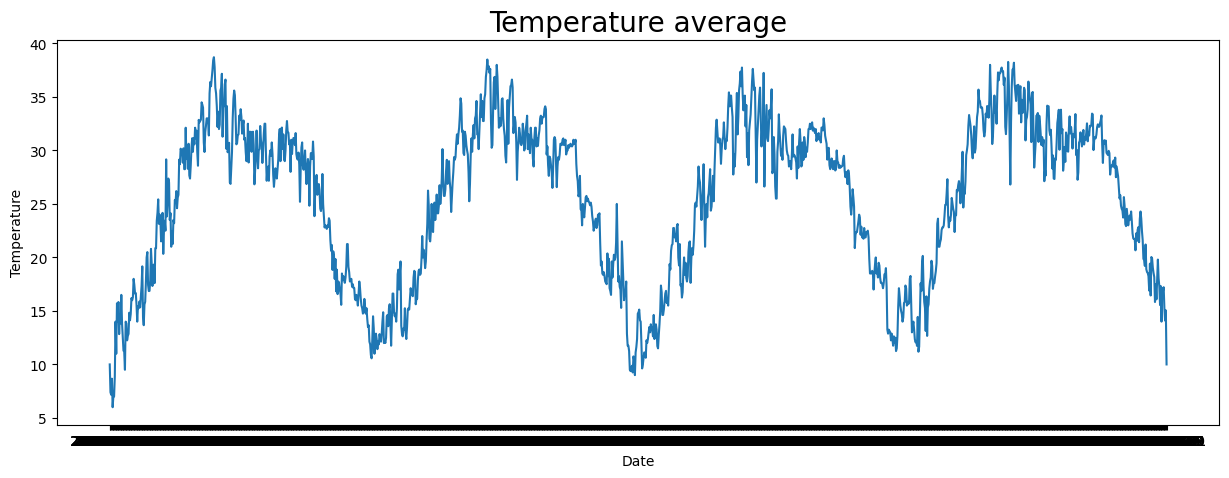

In [7]:
plt.figure(figsize=(15,5))
plt.plot(dates, temp)
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature average',
          fontsize=20);

## Preprocessing

In [8]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [9]:
train_set = windowed_dataset(temp, window_size=60, batch_size=100, shuffle_buffer=1000)
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
])

2025-03-16 22:23:32.988847: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [10]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=100)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 25.3767 - mae: 25.8767
Epoch 2/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 2s 173ms/step - loss: 24.8255 - mae: 25.3255

2025-03-16 22:23:50.288945: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 25.5094 - mae: 26.0094
Epoch 3/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step - loss: 25.1640 - mae: 25.6640

2025-03-16 22:23:51.055321: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 25.3234 - mae: 25.8234
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 24.9461 - mae: 25.4461
Epoch 5/100


2025-03-16 22:23:52.622160: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 25.1439 - mae: 25.6439
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 25.0242 - mae: 25.5242
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 24.6533 - mae: 25.1533
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 24.6232 - mae: 25.1232
Epoch 9/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 2s 165ms/step - loss: 23.8070 - mae: 24.3070

2025-03-16 22:23:55.659514: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 24.4822 - mae: 24.9822
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 24.2452 - mae: 24.7452
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 24.1354 - mae: 24.6354
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 23.8572 - mae: 24.3572
Epoch 13/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 23.6674 - mae: 24.1674
Epoch 14/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 23.5945 - mae: 24.0945
Epoch 15/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 22.9664 - mae: 23.4664
Epoch 16/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 22.5149 - mae: 23.0149
Epoch 17/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 2s 151ms/step - loss: 22.0635 - mae: 22.5635

2025-03-16 22:24:01.819640: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 22.1516 - mae: 22.6516
Epoch 18/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 21.5423 - mae: 22.0423
Epoch 19/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 20.9565 - mae: 21.4565
Epoch 20/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 19.6384 - mae: 20.1384
Epoch 21/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 18.5186 - mae: 19.0186
Epoch 22/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 16.7837 - mae: 17.2836
Epoch 23/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 14.3995 - mae: 14.8957
Epoch 24/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 11.4503 - mae: 11.9414
Epoch 25/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 8.4383 - mae: 8.9269
Epoch 26/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 6.2826 - mae: 6.7725
Epoch 27/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 5.3154 - mae: 5.8042
Epoch 28/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 5.1342 - mae: 5.6199
Epoch 29/100


2025-03-16 22:24:13.946290: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 4.7670 - mae: 5.2495
Epoch 34/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 4.5636 - mae: 5.0511
Epoch 35/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 4.1527 - mae: 4.6398
Epoch 36/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 3.8775 - mae: 4.3518
Epoch 37/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 3.1713 - mae: 3.6390
Epoch 38/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 3.0270 - mae: 3.4934
Epoch 39/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 2.6322 - mae: 3.0982
Epoch 40/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 2.5126 - mae: 2.9725
Epoch 41/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 2.3434 - mae: 2.8022
Epoch 42/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 1.9007 - mae: 2.3532
Epoch 43/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 1.7548 - mae: 2.2018
Epoch 44/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 1.6502 - mae: 2.1060
Epoch 45/100
15/15 ━━━━━━━━━━

2025-03-16 22:24:38.155284: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 1.2509 - mae: 1.6859
Epoch 66/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 1.1587 - mae: 1.5913
Epoch 67/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 1.2173 - mae: 1.6515
Epoch 68/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 1.1741 - mae: 1.6037
Epoch 69/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 1.6005 - mae: 2.0570
Epoch 70/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 1.1990 - mae: 1.6279
Epoch 71/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 1.1782 - mae: 1.6063
Epoch 72/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 1.1392 - mae: 1.5684
Epoch 73/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 1.2729 - mae: 1.7144
Epoch 74/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 1.0898 - mae: 1.5194
Epoch 75/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 1.1068 - mae: 1.5339
Epoch 76/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 2.0188 - mae: 2.4764
Epoch 77/100
15/15 ━━━━━━━━━━

In [11]:
forecast = history.model.predict(train_set)
forecast

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


array([[28.259779],
       [21.662706],
       [26.028484],
       ...,
       [15.469086],
       [27.743408],
       [29.006319]], dtype=float32)